In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
random_seed = 7
np.random.seed(random_seed)

In [4]:
# 3.2 Load Data

filename = 'Iris.csv'

df = pd.read_csv(filename)

In [5]:
# 4.1 Preprocess Data

print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Perform Exploratory Data Analysis on Dataset
print(df.shape)

(150, 6)


In [7]:
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [8]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print(df.describe(include=None))

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [10]:
# Class distribution, how many records for each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


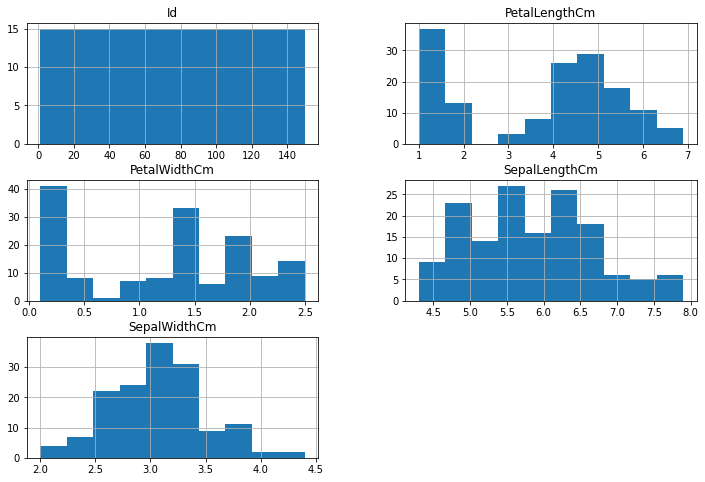

In [11]:
# Plot histogram for each numeric variable/attribute of the dataset

df.hist(figsize=(12, 8))
pyplot.show()

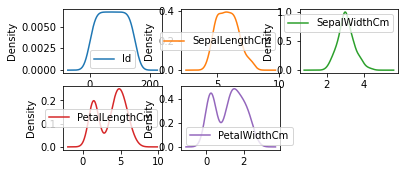

In [12]:
# Density plots

df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True)
pyplot.show()

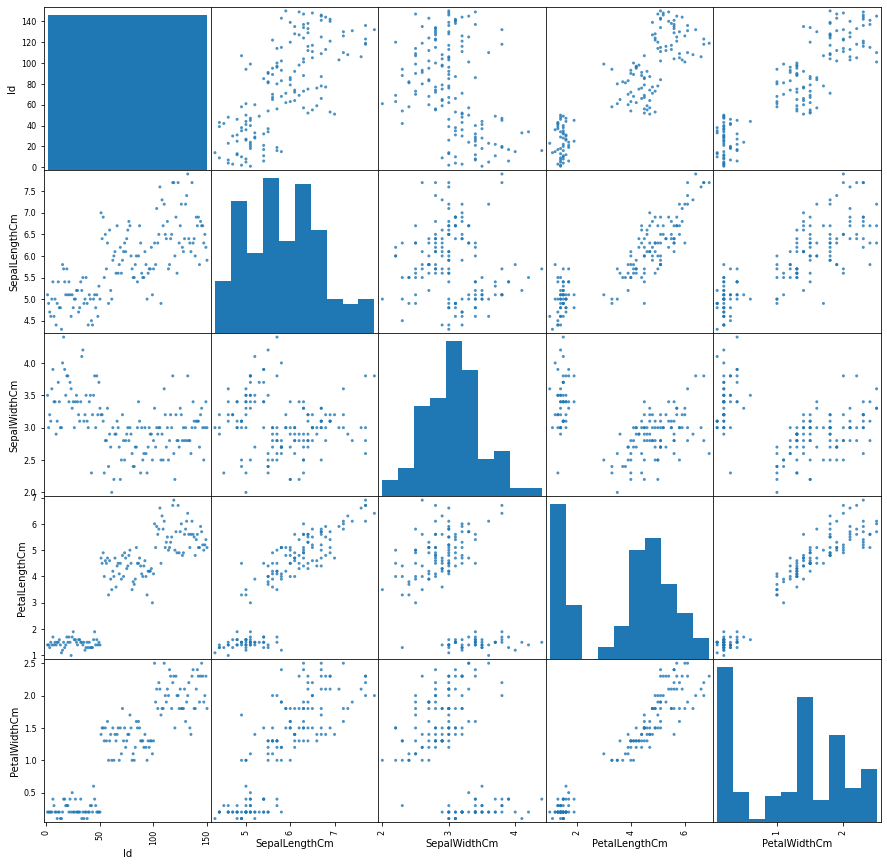

In [13]:
# SCatter plot matrix

scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

In [14]:
# 6. Seperate Datasets into inputs and outputs

array = df.values

#Seperate array into input and output by slicing
X = array[:,1:5]

# For Y
Y = array[:,5]

In [15]:
# 7. Split Input/Output Arrays into training and Testing datasets

test_size = 0.33

# Selection of records randomly seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed)

In [16]:
# 8. Encode Class Values - One Hot Coding

# Encode class values as integers
encoder_train = LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train = encoder_train.transform(Y_train)

# one hot format
onehot_Y_train = np_utils.to_categorical(encoded_Y_train)

#Convert integers into one hot codeing
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)

# One Hot Coding format
onehot_Y_test = np_utils.to_categorical(encoded_Y_test)

In [19]:
# Build an MLP (Fully Connected Neural Network) Model

# 9.1 Design an MLP Model
# define a function to create baseline model

def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [20]:
# Create the model

model = baseline_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
# 10. Train the model

model.fit(X_train, onehot_Y_train, epochs=150, batch_size=10)


Epoch 1/150
100/100 [==============================] - 1s 5ms/step - loss: 1.1559 - accuracy: 0.2600
Epoch 2/150
100/100 [==============================] - 0s 178us/step - loss: 1.1323 - accuracy: 0.2600
Epoch 3/150
100/100 [==============================] - 0s 160us/step - loss: 1.1170 - accuracy: 0.2900
Epoch 4/150
100/100 [==============================] - 0s 161us/step - loss: 1.1046 - accuracy: 0.3000
Epoch 5/150
100/100 [==============================] - 0s 165us/step - loss: 1.0953 - accuracy: 0.2900
Epoch 6/150
100/100 [==============================] - 0s 160us/step - loss: 1.0845 - accuracy: 0.3500
Epoch 7/150
100/100 [==============================] - 0s 159us/step - loss: 1.0777 - accuracy: 0.3600
Epoch 8/150
100/100 [==============================] - 0s 156us/step - loss: 1.0677 - accuracy: 0.3800
Epoch 9/150
100/100 [==============================] - 0s 163us/step - loss: 1.0599 - accuracy: 0.4100
Epoch 10/150
100/100 [==============================] - 0s 163us/step - lo

In [22]:
# 11. Evaluate Model with K-Fold Cross Validation

# 11.1 Create Keras Classifier 
evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

In [23]:
# 11.2 Evaluate the model

kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

In [24]:
# Evaluate the model
results = cross_val_score(evaluator, X_test, onehot_Y_test, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
45/45 [==============================] - 0s 9ms/step - loss: 1.1858 - accuracy: 0.4889
Epoch 2/200
45/45 [==============================] - 0s 311us/step - loss: 1.1572 - accuracy: 0.5111
Epoch 3/200
45/45 [==============================] - 0s 313us/step - loss: 1.1399 - accuracy: 0.5333
Epoch 4/200
45/45 [==============================] - 0s 304us/step - loss: 1.1274 - accuracy: 0.4889
Epoch 5/200
45/45 [==============================] - 0s 304us/step - loss: 1.1137 - accuracy: 0.5778
Epoch 6/200
45/45 [==============================] - 0s 313us/step - loss: 1.0998 - accuracy: 0.6000
Epoch 7/200
45/45 [==============================] - 0s 315us/step - loss: 1.0882 - accuracy: 0.5556
Epoch 8/200
45/45 [==============================] - 0s 340us/step - loss: 1.0772 - accuracy: 0.6000
Epoch 9/200
45/45 [==============================] - 0s 336us/step - loss: 1.0662 - accuracy: 0.5778
Epoch 10/200
45/45 [==============================] - 0s 310us/step - loss: 1.0571 - accuracy

In [25]:
# 12. Evaluate Using model.evaluate()

scores = model.evaluate(X_test, onehot_Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 3ms/step

accuracy: 98.00%
